# test auto encoder

## chargements des donnees 

In [1]:
import sys 
sys.path.append('..')
from projet_etu import *
import numpy as np 
import matplotlib as plt 
from mltools import *
from utils import *
import pickle as pkl
from loss import *
from activation import *
from sklearn.datasets import load_digits

(array([488., 412., 311., 260., 306., 244., 261., 282., 224., 281.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <BarContainer object of 10 artists>)

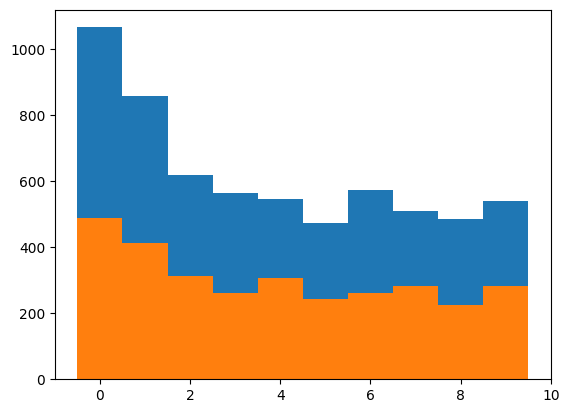

In [2]:
# Chargement des données
data = pkl.load(open("../data/usps.pkl",'rb')) 
# data est un dictionnaire contenant les champs explicites X_train, X_test, Y_train, Y_test
X_train = np.array(data["X_train"],dtype=float) # changement de type pour éviter les problèmes d'affichage
X_test = np.array(data["X_test"],dtype=float)
Y_train = data["Y_train"]
Y_test = data["Y_test"]


# onehot encoding
Y_train_onehot = onehot(Y_train)
Y_test_onehot = onehot(Y_test)
Y_train_onehot = Y_train_onehot.astype(int)


# normalisation des données
X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)


# visualisation de la distribution des étiquettes (dans les 10 classes de chiffres)
plt.figure()
plt.hist(Y_train, np.linspace(-0.5,9.5,11))
plt.hist(Y_test, np.linspace(-0.5,9.5,11))
#plt.savefig("distr_classes.png")

(6229, 256)
(3069, 256) (6229,) (3069,)


Text(0.5, 1.0, 'Image de : 6')

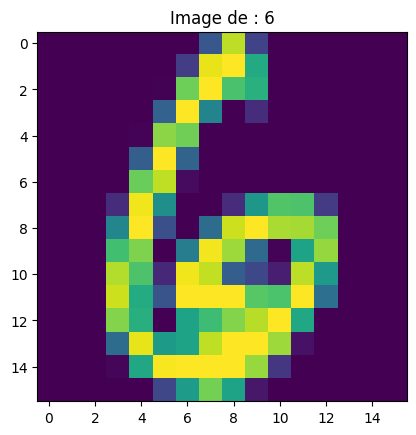

In [3]:
# prise en main des matrices X, Y
print(X_train.shape)
# 6229 images composées de 256 pixels (image = 16x16)
print(X_test.shape,Y_train.shape, Y_test.shape)

# Affichage de l'image 18 de la base de données et récupération de l'étiquette associée:
# (1) remise en forme de la ligne de 256 pixels en 16x16
# (2) affichage avec imshow (en niveaux de gris)
# (3) récupération de l'étiquette dans Y_train

plt.figure()
plt.imshow(X_train[18].reshape(16,16))
plt.title("Image de : {}".format(Y_train[18]))

In [4]:
value , count = np.unique(Y_train, return_counts=True)

print(value)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
linear1 = Linear(256, 128)
tanh = TanH()
softmax = Softmax()
sigmoid = Sigmoid()
linear2 = Linear(128, 10)
bce_loss = BCELoss()

loss_list= []
encoder = [linear1, tanh, linear2,tanh]
decoder = [Linear(10, 128), tanh, Linear(128, 256), sigmoid]
net = Sequential(encoder+decoder)

### parcours full batch 

In [6]:
# Boucle d'entraînement en full batc
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass
    yhat = net.forward(X_train)

    # Calculer la perte
    loss = bce_loss.forward(X_train, yhat)
    if epoch % 10 == 0:
        print("Epoch %d: Loss = %f" % (epoch, np.mean(loss)))

    loss_list.append(loss.mean())

    # Backward pass
    # print(tan.shape)
    # print(delta.shape)
    # print(linear2._gradient.shape)
    delta = bce_loss.backward(X_train, yhat)
    delta = net.backward(X_train, delta, gradient_step = 0.1)


Epoch 0: Loss = 0.701692
Epoch 10: Loss = 0.481592
Epoch 20: Loss = 0.491979
Epoch 30: Loss = 0.462189
Epoch 40: Loss = 0.425796
Epoch 50: Loss = 0.410105
Epoch 60: Loss = 0.407238
Epoch 70: Loss = 0.384693
Epoch 80: Loss = 0.377138
Epoch 90: Loss = 0.387010
Epoch 100: Loss = 0.389187
Epoch 110: Loss = 0.363558
Epoch 120: Loss = 0.363166
Epoch 130: Loss = 0.366801
Epoch 140: Loss = 0.356725
Epoch 150: Loss = 0.355741
Epoch 160: Loss = 0.359138
Epoch 170: Loss = 0.352185
Epoch 180: Loss = 0.363312
Epoch 190: Loss = 0.345390
Epoch 200: Loss = 0.343380
Epoch 210: Loss = 0.344194
Epoch 220: Loss = 0.339564
Epoch 230: Loss = 0.334719
Epoch 240: Loss = 0.335087
Epoch 250: Loss = 0.339251
Epoch 260: Loss = 0.338574
Epoch 270: Loss = 0.336099
Epoch 280: Loss = 0.320873
Epoch 290: Loss = 0.319472
Epoch 300: Loss = 0.378481
Epoch 310: Loss = 0.321451
Epoch 320: Loss = 0.323147
Epoch 330: Loss = 0.324483
Epoch 340: Loss = 0.318548
Epoch 350: Loss = 0.315122
Epoch 360: Loss = 0.312136
Epoch 370: L

[0.701692407688635, 0.6466235984726234, 0.512334350954187, 0.48867369624939067, 0.48450901200714425, 0.4832410748111934, 0.48256285961089135, 0.4822014954741913, 0.48194360516838347, 0.4817643072651851, 0.48159160367709386, 0.48137615684626406, 0.480776584554815, 0.47856955526769945, 0.4774533039555623, 0.4913208525664095, 0.48499338036455564, 0.4768916794509743, 0.4896739722042116, 0.48572048293479814, 0.49197944736682026, 0.48995719025709855, 0.4776006134976715, 0.46999232680081293, 0.4782327604143299, 0.47459717558663284, 0.4958882149965568, 0.4930754152227403, 0.47944681358936553, 0.47265782805079826, 0.4621894629148207, 0.4511399658417569, 0.4448437156469589, 0.4451688260246327, 0.46558321046337303, 0.4833028480212895, 0.49662213715119247, 0.475552622961952, 0.44134035164068697, 0.4309882731372415, 0.4257956318421807, 0.42342071945099524, 0.42942402914053995, 0.44788639112542655, 0.43036688248848837, 0.4289112350625477, 0.4354125745864615, 0.4248383802043053, 0.416972031976151, 0.

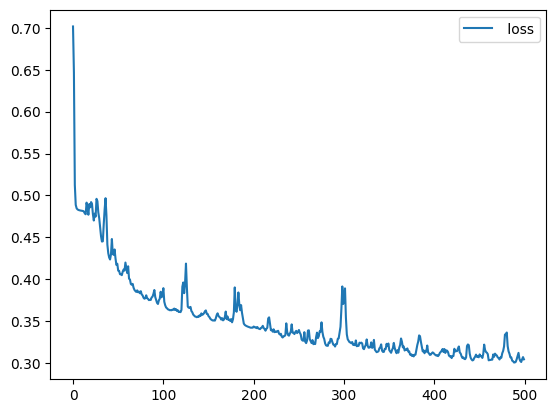

In [7]:
print(loss_list)
plt.plot(loss_list,label =' loss')
plt.legend()
plt.show()

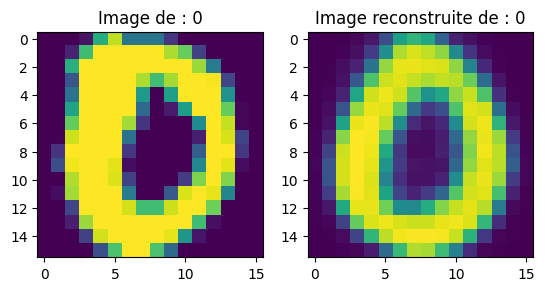

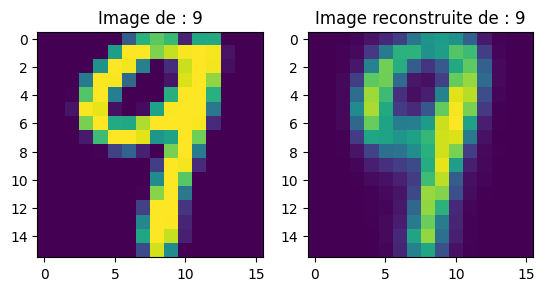

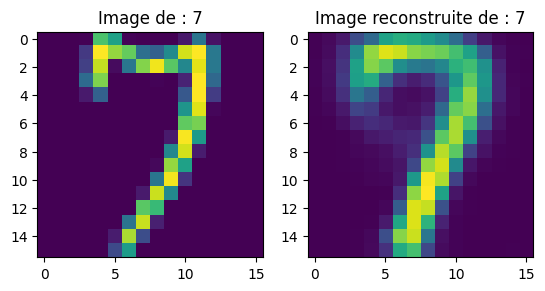

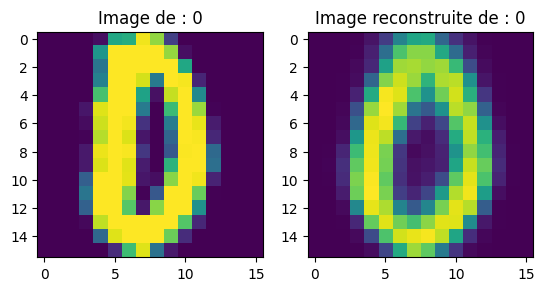

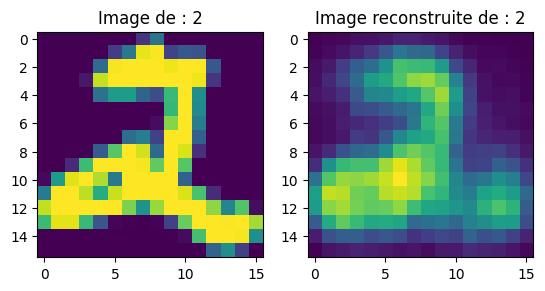

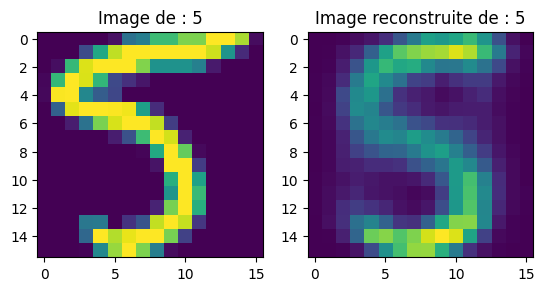

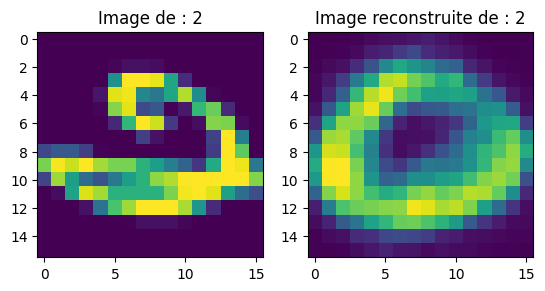

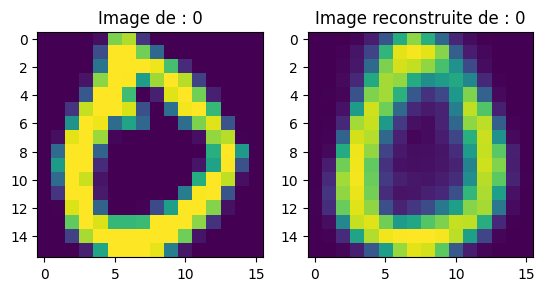

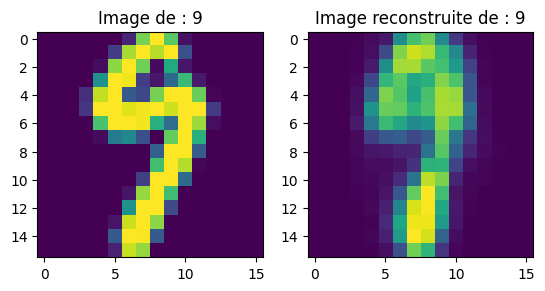

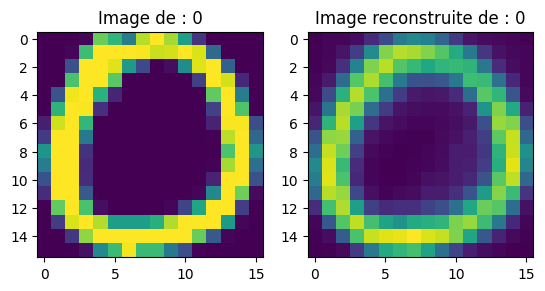

In [8]:
# affichage  des images  qui compare les images reconstruites et les images d'origine sur les donnees d'entrainement
for i in range(10):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(X_train[i].reshape(16,16))
    plt.title("Image de : {}".format(Y_train[i]))
    plt.subplot(1,2,2)
    plt.imshow(net.forward(X_train)[i].reshape(16,16))
    plt.title("Image reconstruite de : {}".format(Y_train[i]))

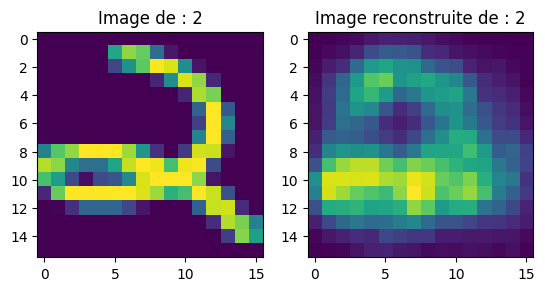

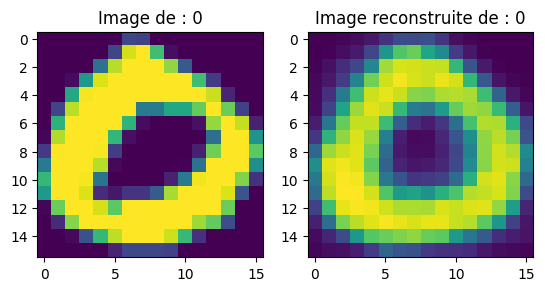

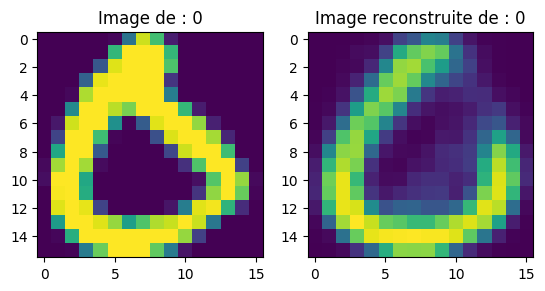

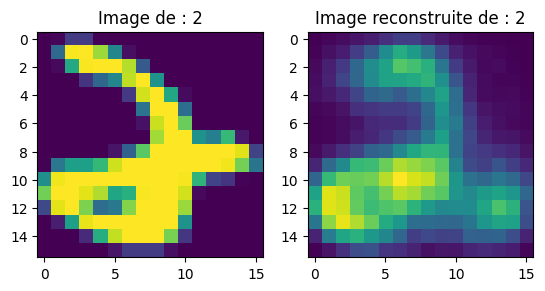

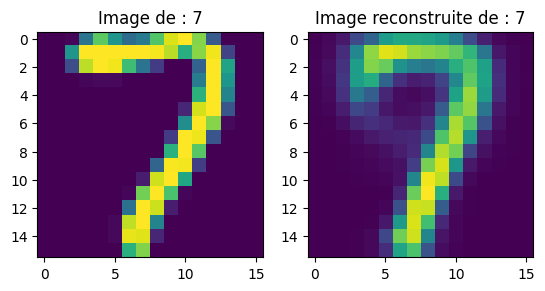

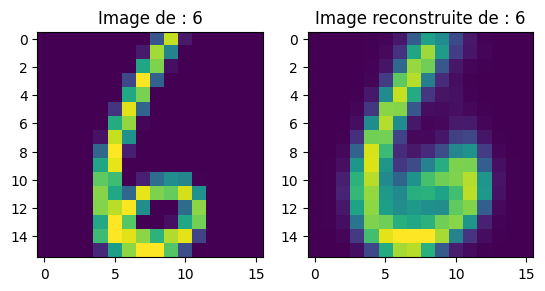

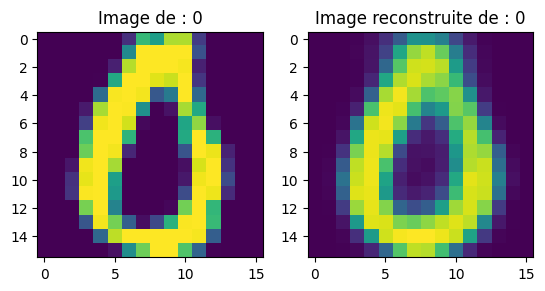

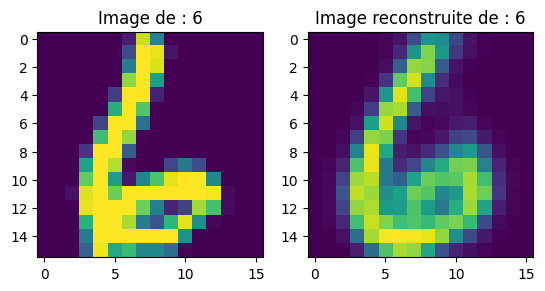

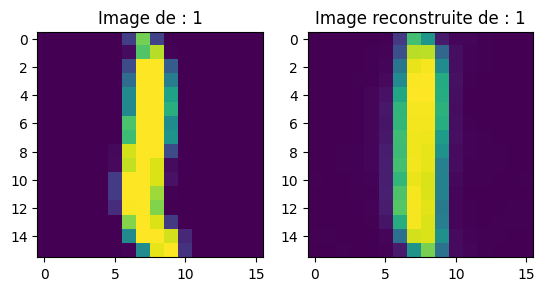

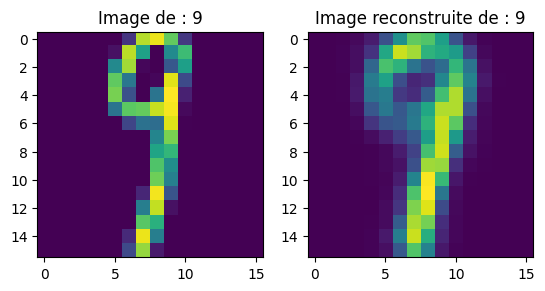

In [9]:
# affichage  des images  qui compare les images reconstruites et les images d'origine sur les donnees de test
for i in range(10):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(X_test[i].reshape(16,16))
    plt.title("Image de : {}".format(Y_test[i]))
    plt.subplot(1,2,2)
    plt.imshow(net.forward(X_test)[i].reshape(16,16))
    plt.title("Image reconstruite de : {}".format(Y_test[i]))

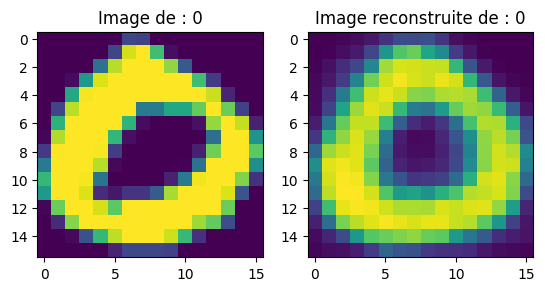

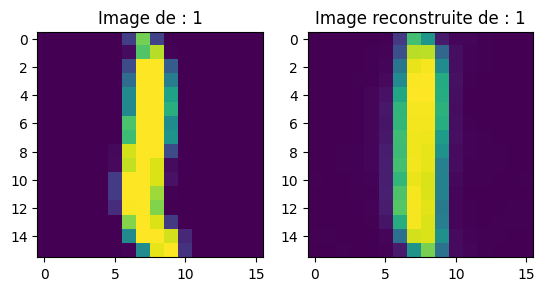

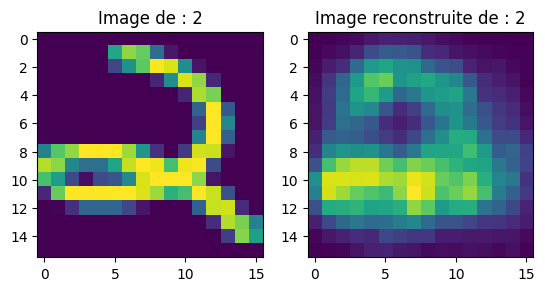

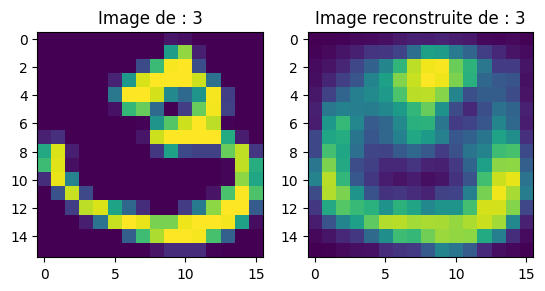

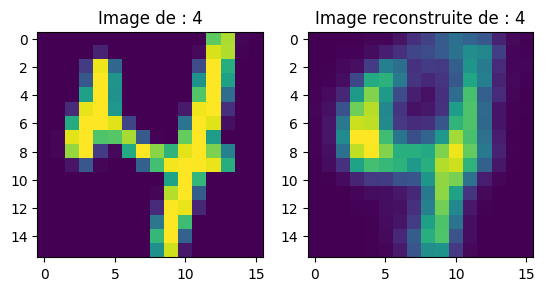

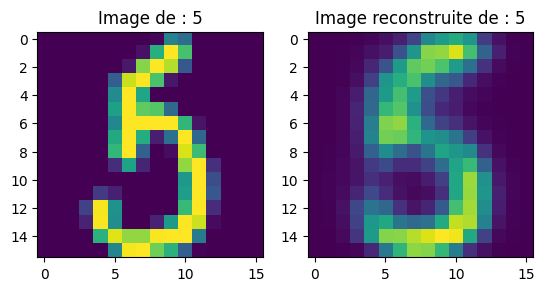

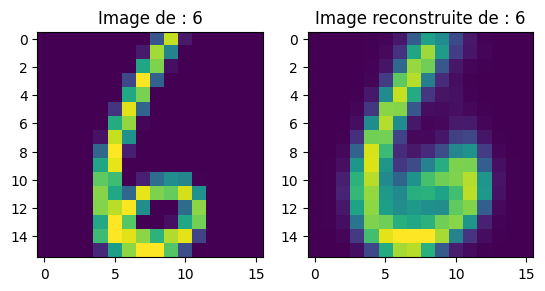

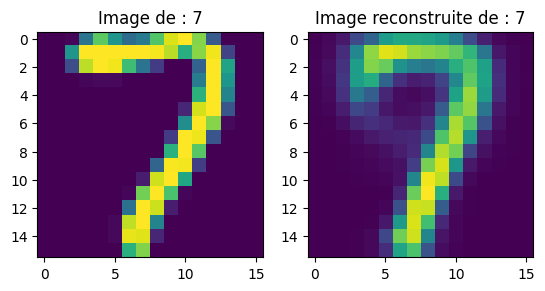

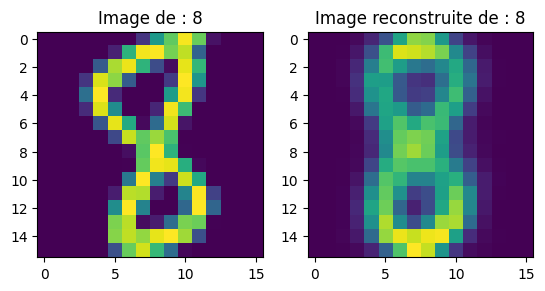

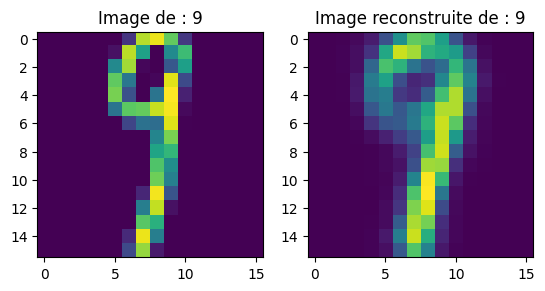

In [10]:
# affichage  des images  qui compare les images reconstruites sur chaque label 
for i in range(10):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(X_test[Y_test==i][0].reshape(16,16))
    plt.title("Image de : {}".format(Y_test[Y_test==i][0]))
    plt.subplot(1,2,2)
    plt.imshow(net.forward(X_test)[Y_test==i][0].reshape(16,16))
    plt.title("Image reconstruite de : {}".format(Y_test[Y_test==i][0]))

### parcours en mini-batch 

In [11]:
linear1 = Linear(256, 128)
tanh = TanH()
softmax = Softmax()
sigmoid = Sigmoid()
linear2 = Linear(128, 10)
bce_loss = BCELoss()

loss_list= []
encoder = [linear1, tanh, linear2,tanh]
decoder = [Linear(10, 128), tanh, Linear(128, 256), sigmoid]
net = Sequential(encoder+decoder)

In [12]:
Lerror , Lscore = SGD(net, bce_loss,X_train, X_train, eps = 0.001 , batch_size = 10, max_iter=300)

Iteration: 0 / 500
cost  0.434
Iteration: 1 / 500
cost  0.389
Iteration: 2 / 500
cost  0.366
Iteration: 3 / 500
cost  0.349
Iteration: 4 / 500
cost  0.337
Iteration: 5 / 500
cost  0.327
Iteration: 6 / 500
cost  0.32
Iteration: 7 / 500
cost  0.314
Iteration: 8 / 500
cost  0.309
Iteration: 9 / 500
cost  0.305
Iteration: 10 / 500
cost  0.301
Iteration: 11 / 500
cost  0.299
Iteration: 12 / 500
cost  0.297
Iteration: 13 / 500
cost  0.294
Iteration: 14 / 500
cost  0.292
Iteration: 15 / 500
cost  0.29
Iteration: 16 / 500
cost  0.288
Iteration: 17 / 500
cost  0.287
Iteration: 18 / 500
cost  0.286
Iteration: 19 / 500
cost  0.285
Iteration: 20 / 500
cost  0.281
Iteration: 21 / 500
cost  0.28
Iteration: 22 / 500
cost  0.28
Iteration: 23 / 500
cost  0.276
Iteration: 24 / 500
cost  0.275
Iteration: 25 / 500
cost  0.274
Iteration: 26 / 500
cost  0.273
Iteration: 27 / 500
cost  0.272
Iteration: 28 / 500
cost  0.271
Iteration: 29 / 500
cost  0.27
Iteration: 30 / 500
cost  0.269
Iteration: 31 / 500
cos

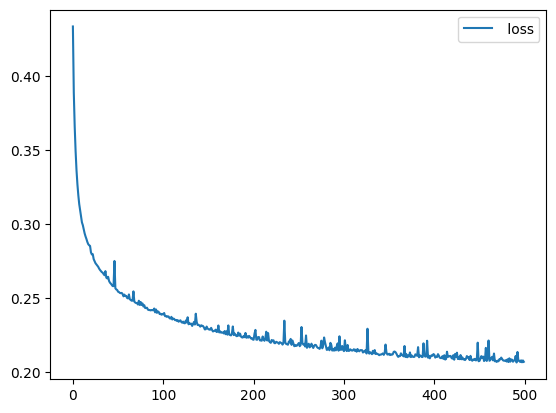

In [13]:
plt.plot(Lerror,label =' loss')
plt.legend()
plt.show()

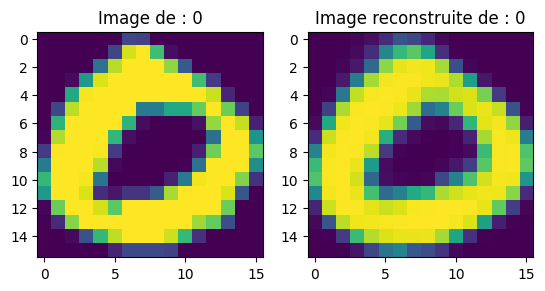

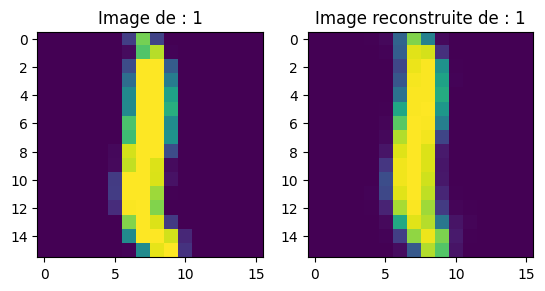

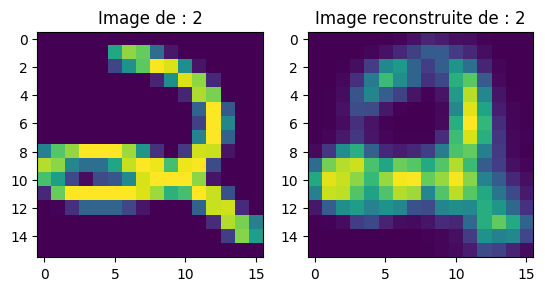

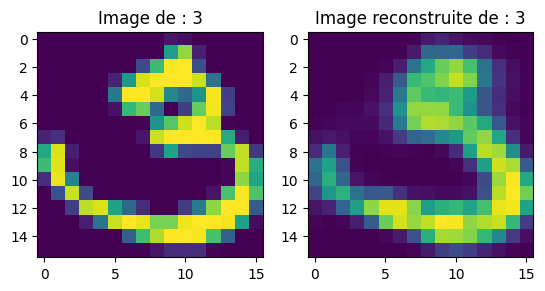

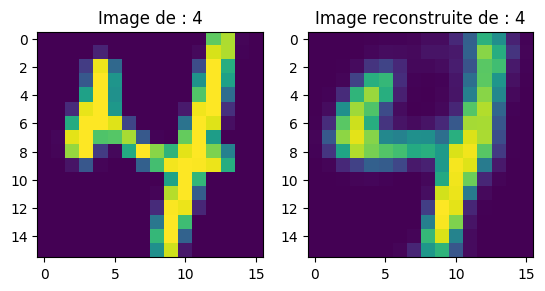

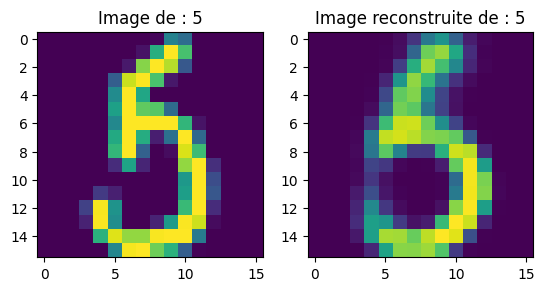

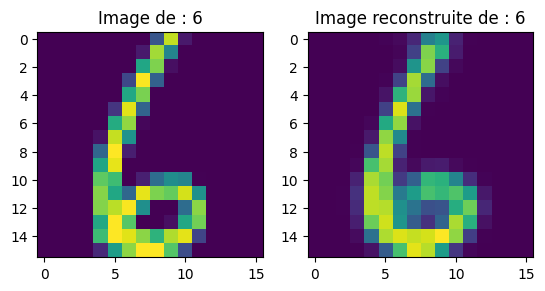

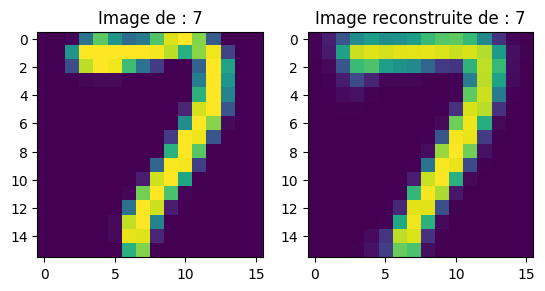

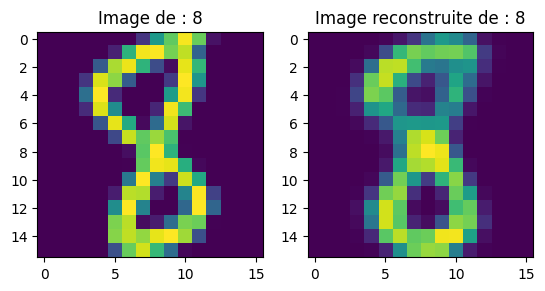

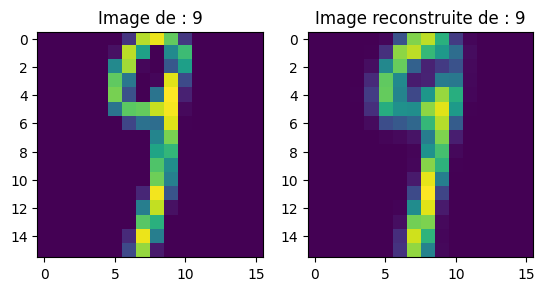

In [14]:
# affichage  des images  qui compare les images reconstruites sur chaque label 
for i in range(10):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(X_test[Y_test==i][0].reshape(16,16))
    plt.title("Image de : {}".format(Y_test[Y_test==i][0]))
    plt.subplot(1,2,2)
    plt.imshow(net.forward(X_test)[Y_test==i][0].reshape(16,16))
    plt.title("Image reconstruite de : {}".format(Y_test[Y_test==i][0]))

**Auto encoder qui a plutot un bon effet sur les donnees usps**